In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier

from sklearn.model_selection import train_test_split

# load functions defined in MNISTFunctions.py
from MNISTFunctions import digit_plot, multidigits_plot, multi_estimators_results

### Load data and split it into train and test set

In [2]:
digits = pd.read_csv('Data/train.csv')

X = digits.drop('label', axis=1)
y = digits['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Train set shape :', X_train.shape)
print('Test set shape :', X_test.shape)

Train set shape : (33600, 784)
Test set shape : (8400, 784)


### The distribution of digits in  the dataset.

In [3]:
y_count = y.value_counts()
y_pct = y_count/len(y)*100
y_pct.round(2)

1    11.15
7    10.48
3    10.36
9     9.97
2     9.95
6     9.85
0     9.84
4     9.70
8     9.67
5     9.04
Name: label, dtype: float64

It's quite balanced, not a perfect 10% for every digits, but that's fine.

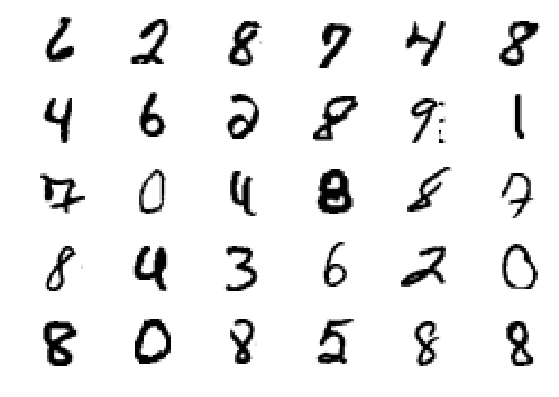

In [4]:
digits = X.sample(30)
multidigits_plot(digits)

# Principal Components Analysis

In [5]:
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X_train)

# Get X_train in the base of pca
X_train_pca = pca.transform(X_train)

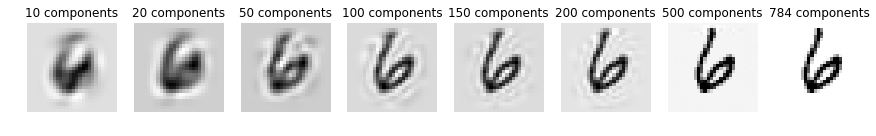

In [6]:
# Do the inverse transform after having selected only the first i rows

n_first_components = [10, 20, 50, 100, 150, 200, 500, 784]

n_len = len(n_first_components)
fig, ax = plt.subplots(1,n_len)

for i, ax in zip(n_first_components, ax):
    # select a copy of a digit from X_train_pca
    digit_pca = X_train_pca[0].copy()
    digit_pca[i:] = 0
    digit_reformed = pca.inverse_transform(digit_pca)
    #plot the digit
    digit_plot(digit_reformed, ax=ax)
    ax.set_title(str(i)+' components')
    
fig.set_size_inches(15,5)

We see that PCA is very effective at reducing the number of features while still retaining enough information to be able to recognize the value of the digit.

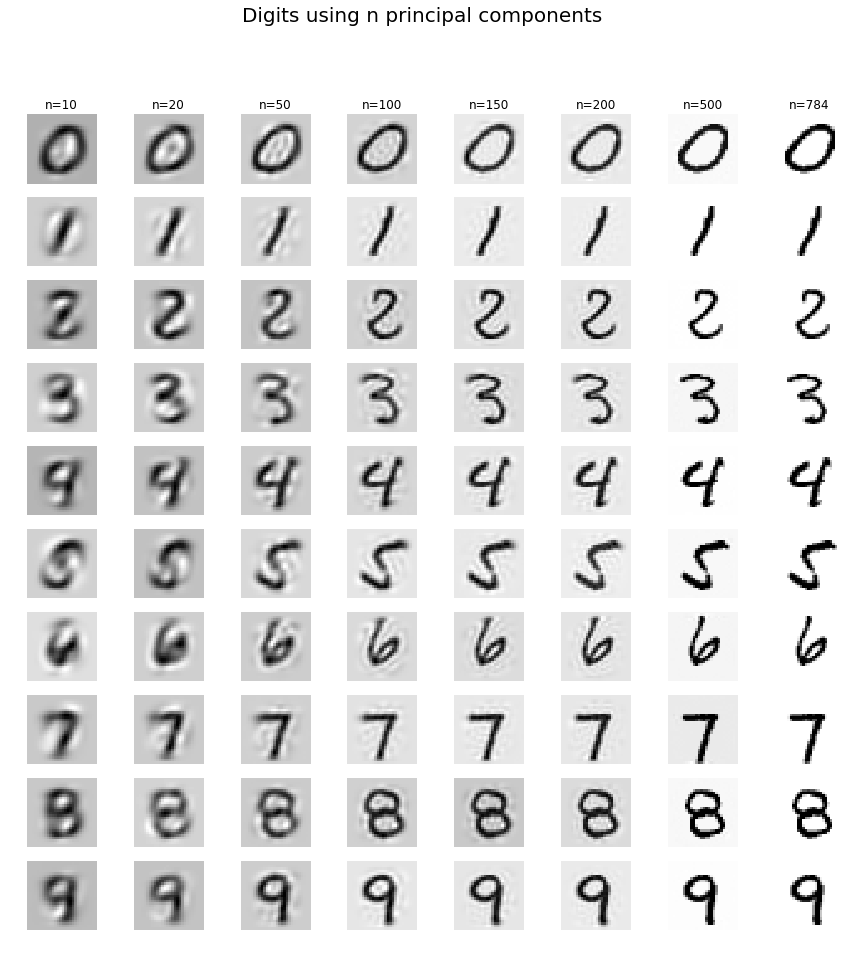

In [7]:
digits = []
for i in range(10):
    i_digits = X_train_pca[y_train==i, :]
    i_digit = i_digits[0]
    digits.append(i_digit)
    
n_first_components = [10, 20, 50, 100, 150, 200, 500, 784]

n_digits = len(digits)
n_len = len(n_first_components)
fig, ax = plt.subplots(n_digits, n_len)

first_row = True
for digit, ax in zip(digits, ax):
    for i, ax in zip(n_first_components, ax):
        # select a copy of a digit from X_train_pca
        digit_pca = digit.copy()
        digit_pca[i:] = 0
        digit_reformed = pca.inverse_transform(digit_pca)
        #plot the digit
        digit_plot(digit_reformed, ax=ax)
        
        # write number of components if first row
        if first_row:
            ax.set_title('n='+str(i))
            
    first_row = False
            
plt.suptitle('Digits using n principal components', fontsize=20)
fig.set_size_inches(15,15)

We see that a sweetspot for the number of compents to use is around 50-100, anything above 100 doesn't bring more useful information.

# Models

In [8]:
pca = PCA(100)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

estimators = [LogisticRegression(solver='lbfgs'),
              LinearSVC(),
              DecisionTreeClassifier(),
              RandomForestClassifier(),
              ExtraTreesClassifier()
              ]
results_df, estimators_fitted = multi_estimators_results(estimators, X_train_pca, X_test_pca, y_train, y_test)
results_df

,Train Accuracy Score,Test Accuracy Score,Fitting Time
LogisticRegression,0.914792,0.909167,5.41961
LinearSVC,0.786667,0.783333,166.08
DecisionTreeClassifier,1,0.822262,7.91327
RandomForestClassifier,0.998661,0.891905,3.26317
ExtraTreesClassifier,1,0.878095,0.848565


LinearSVC took a long time and is mediocre, we will drop it, as well as DecisionTreeClassifier.

In [9]:
pca = PCA(50)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

estimators = [LogisticRegression(solver='lbfgs'),
              RandomForestClassifier(n_estimators=5),
              ExtraTreesClassifier()
              ]
results_df, estimators_fitted = multi_estimators_results(estimators, X_train_pca, X_test_pca, y_train, y_test)
results_df

,Train Accuracy Score,Test Accuracy Score,Fitting Time
LogisticRegression,0.900595,0.89881,2.67778
RandomForestClassifier,0.990298,0.864762,1.19279
ExtraTreesClassifier,1,0.906429,0.564376
